In [1]:
import os, sys
import datetime
from datetime import datetime, date, timedelta
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
from pandas_profiling import ProfileReport
import mglearn
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'svg'
from mpl_toolkits.mplot3d import Axes3D, axes3d
from scipy import sparse
import scipy.stats as ss
import scipy.cluster.hierarchy as sch
import pingouin as pg
import spacy, nltk
from konlpy.tag import Okt

c:\Users\admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
cats = pd.read_csv('data_ba/cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [11]:
pd.concat([cats.dtypes, cats.nunique()], axis=1), cats.shape

(           0   1
 Sex   object   2
 Bwt  float64  20
 Hwt  float64  73,
 (144, 3))

In [8]:
# 귀무가설: 정규성을 가진다 / 대립가설: 정규성을 가지지 않는다
ss.shapiro(cats['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [9]:
mu = 2.6
ss.wilcoxon(cats['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [10]:
ss.ttest_1samp(cats['Bwt'], popmean=mu, alternative='two-sided')

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

<AxesSubplot:ylabel='Frequency'>

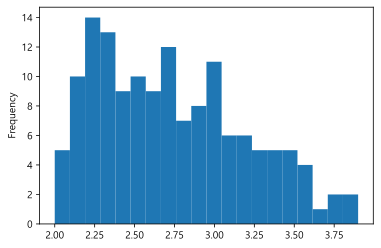

In [14]:
cats['Bwt'].plot.hist(bins=20)